<a href="https://colab.research.google.com/github/ADSRichards/Statistical_Mechanics/blob/master/Ising/NearestNeighborCoupling/SquareLattice/TransferMatrix/TransferMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib as plt

Constructing all of the configurations of an Ising chain

In [255]:
L = 6 # Length of the lattice

def dec2bin(x_dec):
    x_bin = [int(d) for d in bin(int(pow(2,L)) + x_dec)[2:(2+L+1)]]
    x_bin = x_bin[1:(L+1)]
    return x_bin

phi = []
for i in range(0,pow(2,L)):
    phi.append([2*x-1 for x in dec2bin(i)])
  
print(phi)

[[-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, 1], [-1, -1, -1, -1, 1, -1], [-1, -1, -1, -1, 1, 1], [-1, -1, -1, 1, -1, -1], [-1, -1, -1, 1, -1, 1], [-1, -1, -1, 1, 1, -1], [-1, -1, -1, 1, 1, 1], [-1, -1, 1, -1, -1, -1], [-1, -1, 1, -1, -1, 1], [-1, -1, 1, -1, 1, -1], [-1, -1, 1, -1, 1, 1], [-1, -1, 1, 1, -1, -1], [-1, -1, 1, 1, -1, 1], [-1, -1, 1, 1, 1, -1], [-1, -1, 1, 1, 1, 1], [-1, 1, -1, -1, -1, -1], [-1, 1, -1, -1, -1, 1], [-1, 1, -1, -1, 1, -1], [-1, 1, -1, -1, 1, 1], [-1, 1, -1, 1, -1, -1], [-1, 1, -1, 1, -1, 1], [-1, 1, -1, 1, 1, -1], [-1, 1, -1, 1, 1, 1], [-1, 1, 1, -1, -1, -1], [-1, 1, 1, -1, -1, 1], [-1, 1, 1, -1, 1, -1], [-1, 1, 1, -1, 1, 1], [-1, 1, 1, 1, -1, -1], [-1, 1, 1, 1, -1, 1], [-1, 1, 1, 1, 1, -1], [-1, 1, 1, 1, 1, 1], [1, -1, -1, -1, -1, -1], [1, -1, -1, -1, -1, 1], [1, -1, -1, -1, 1, -1], [1, -1, -1, -1, 1, 1], [1, -1, -1, 1, -1, -1], [1, -1, -1, 1, -1, 1], [1, -1, -1, 1, 1, -1], [1, -1, -1, 1, 1, 1], [1, -1, 1, -1, -1, -1], [1, -1, 1, -1, -1, 1], [1, -1, 1, -

Now we may construct the matrix elements of the transfer matrix and subsequently the partition function. \\
The compuationaly complexity of this naive approach grows exponentially in the vertical size of the lattice.

In [0]:
def PFunction(T,J):
    TM = [] # the transfer matrix
    for i in range(0,pow(2,L)):
        phi_i = phi[i]
        TMi = []
        for j in range(0,pow(2,L)):
            phi_j = phi[j]
            
            K = 0
            for i in range(0,L):
                K = K + phi_i[i]*phi_i[(i+1)%L]  
                K = K + phi_j[i]*phi_j[(i+1)%L] 
                K = K + 2*phi_i[i]*phi_j[i]    
            TMi.append(np.exp(J/2/T*K))
            
        TM.append(TMi)
    return np.trace(np.linalg.matrix_power(TM,L));

Now with the partition function we may find all of the thermodynamic quantities.

For example, the internal energy is \\
$U = -\frac{\partial \log Z}{\partial \beta}$

Text(0, 0.5, 'U')

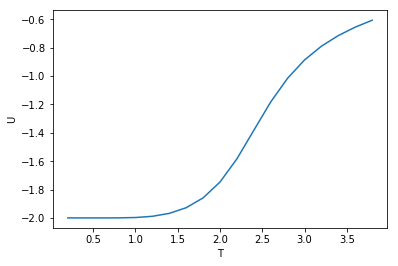

In [270]:
J = 1
delT = 1e-5

U = []
T_grid = []
TN = 20
T_scale = 0.2

for i in range(1,TN):
    T = T_scale*i
    T_grid.append(T)
    Z1 = PFunction(T,J)
    Z2 = PFunction(T+delT,J)
    
    U.append(T*T*(np.log(Z2)-np.log(Z1))/(L*L*delT))

plt.pyplot.plot(T_grid, U)
plt.pyplot.xlabel('T')
plt.pyplot.ylabel('U')

This is an exact calculation (up to numerical errors) of the intenal energy for the $L\times L$ system and can be verified with Monte Carlo simulations.